# LSTM 신경망 훈련하기

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42
)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [4]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 60ms/step - loss: 0.6923 - accuracy: 0.5296 - val_loss: 0.6917 - val_accuracy: 0.5528
Epoch 2/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6899 - accuracy: 0.5989 - val_loss: 0.6886 - val_accuracy: 0.6084
Epoch 3/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6850 - accuracy: 0.6387 - val_loss: 0.6817 - val_accuracy: 0.6416
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6711 - accuracy: 0.6748 - val_loss: 0.6557 - val_accuracy: 0.6790
Epoch 5/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6082 - accuracy: 0.7117 - val_loss: 0.5837 - val_accuracy: 0.7320
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5657 - accuracy: 0.7423 - val_loss: 0.5625 - val_accuracy: 0.7476
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5423 - accuracy: 0.7566 - val_loss: 0.5375 - val_ac

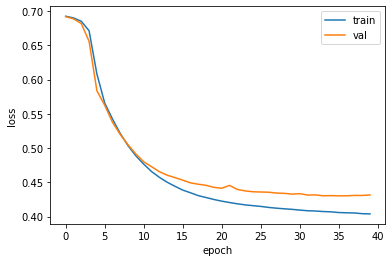

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 순환층에 드롭아웃 적용

In [10]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 40ms/step - loss: 0.6920 - accuracy: 0.5487 - val_loss: 0.6907 - val_accuracy: 0.5994
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6879 - accuracy: 0.6211 - val_loss: 0.6846 - val_accuracy: 0.6514
Epoch 3/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6715 - accuracy: 0.6665 - val_loss: 0.6434 - val_accuracy: 0.6514
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6029 - accuracy: 0.7151 - val_loss: 0.5731 - val_accuracy: 0.7314
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5623 - accuracy: 0.7315 - val_loss: 0.5495 - val_accuracy: 0.7478
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5406 - accuracy: 0.7445 - val_loss: 0.5308 - val_accuracy: 0.7554
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5234 - accuracy: 0.7559 - val_loss: 0.5187 - val_ac

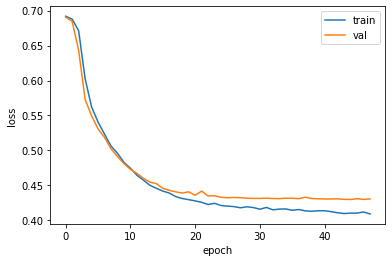

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 2개의 층 연결

In [8]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 27s 75ms/step - loss: 0.6925 - accuracy: 0.5294 - val_loss: 0.6911 - val_accuracy: 0.5856
Epoch 2/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6873 - accuracy: 0.6001 - val_loss: 0.6809 - val_accuracy: 0.6454
Epoch 3/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6569 - accuracy: 0.6564 - val_loss: 0.6206 - val_accuracy: 0.6982
Epoch 4/100
313/313 [==============================] - 24s 77ms/step - loss: 0.5815 - accuracy: 0.7169 - val_loss: 0.5567 - val_accuracy: 0.7292
Epoch 5/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5423 - accuracy: 0.7416 - val_loss: 0.5253 - val_accuracy: 0.7532
Epoch 6/100
313/313 [==============================] - 23s 73ms/step - loss: 0.5220 - accuracy: 0.7556 - val_loss: 0.5056 - val_accuracy: 0.7682
Epoch 7/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5062 - accuracy: 0.7644 - val_loss: 0.4918 - val_ac

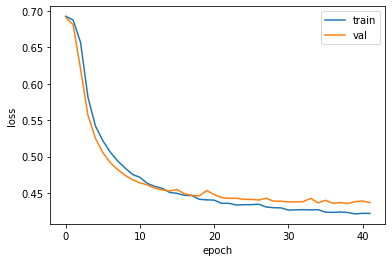

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# GRU 신경망 훈련

In [15]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 41ms/step - loss: 0.6923 - accuracy: 0.5222 - val_loss: 0.6902 - val_accuracy: 0.5706
Epoch 2/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6885 - accuracy: 0.5779 - val_loss: 0.6862 - val_accuracy: 0.5918
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6831 - accuracy: 0.5964 - val_loss: 0.6806 - val_accuracy: 0.6058
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6749 - accuracy: 0.6170 - val_loss: 0.6715 - val_accuracy: 0.6128
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6629 - accuracy: 0.6313 - val_loss: 0.6586 - val_accuracy: 0.6272
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6456 - accuracy: 0.6488 - val_loss: 0.6411 - val_accuracy: 0.6412
Epoch 7/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6214 - accuracy: 0.6675 - val_loss: 0.6153 - val_ac

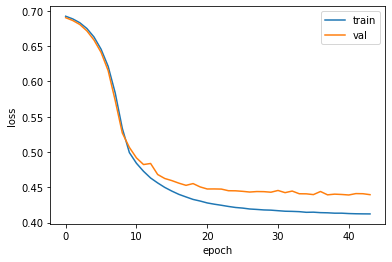

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# LSTM과 GRU 셀로 훈련

In [19]:
test_seq = pad_sequences(test_input, maxlen = 100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 10s 12ms/step - loss: 0.4291 - accuracy: 0.8001


[0.429094135761261, 0.8001199960708618]